<a href="https://colab.research.google.com/github/everestso/47.53.59/blob/master/linear_discriminant_analysis_on_iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/harshamodali/linear-discriminant-analysis-on-iris-dataset

Two-class **Fisher linear discriminant algorithm (LDA)** on the Iris dataset (http://en.wikipedia.org/wiki/Iris_flower_data_set) and the scatter plot in one dimension of the three two-way LDA data projections possible from the three categories (setosa, versicolor, virginica). Computed and reported the best possible thresholds for linear separation (in each of the three cases).

In [1]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import numpy as np
iris = datasets.load_iris();
setosa_versicolor = iris.data[0:100,0:3]
setosa_versicolor_targets = iris.target[0:100]
versicolor_virginica = iris.data[50:150,0:3]
versicolor_virginica_targets = iris.target[50:150]
setosa_virginica = np.concatenate((iris.data[0:50,0:3], iris.data[100:150,0:3]), axis=0)
setosa_virginica_targets = np.concatenate((iris.target[0:50], iris.target[100:150]), axis=0)
target_names = iris.target_names
t1 = ["setosa","versicolor"]
t2 = ["versicolor","virginica"]
t3 = ["setosa","virginica"]
lda = LDA(n_components=1)

In [2]:
def LDA_result(samples,target):
    return lda.fit(samples,target).transform(samples)

def threshold(LDA_result, targets,index_1, index_2):
    mean_class_1 = LDA_result[targets==index_1,0]
    mean_class_2 = LDA_result[targets==index_2,0]
    result_mean = (np.mean(mean_class_1) + np.mean(mean_class_1))/2
    return result_mean.round(decimals=15)

def scatterPlot(LDA_result,targets,index_1, index_2,text):
    for color, i, target_name in zip(['red', 'blue'], [index_1, index_2], target_names):
        plt.scatter(LDA_result[targets==i,0], np.zeros([50]), color=color,
        label=target_name)
        plt.title("Scatter plot for " + text + " classification")
    plt.show()

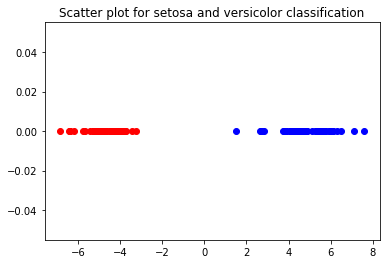

Threshold for setosa and versicolor classification: -4.805763011979293


In [3]:
lda_result = LDA_result(setosa_versicolor,setosa_versicolor_targets)
scatterPlot(lda_result,setosa_versicolor_targets,0,1,"setosa and versicolor")
t = threshold(LDA_result(setosa_versicolor,setosa_versicolor_targets),setosa_versicolor_targets,0,1)
print("Threshold for setosa and versicolor classification: " + str(t))

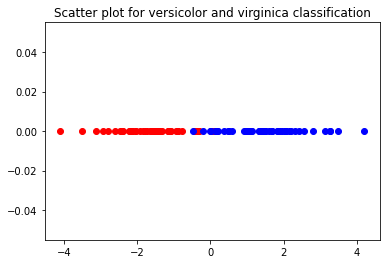

Threshold for versicolor and virginica classification: -1.5104177907815


In [4]:
lda_result = LDA_result(versicolor_virginica,versicolor_virginica_targets)
scatterPlot(lda_result,versicolor_virginica_targets,1,2,"versicolor and virginica")
t = threshold(LDA_result(versicolor_virginica,versicolor_virginica_targets),versicolor_virginica_targets,1,2)
print("Threshold for versicolor and virginica classification: " + str(t))

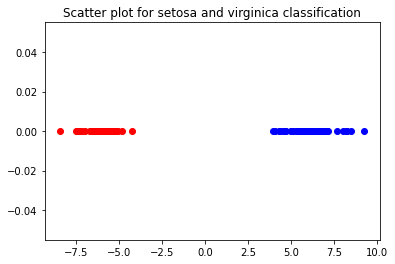

Threshold for setosa and virginica classification: -6.108499551588142


In [5]:
lda_result = LDA_result(setosa_virginica,setosa_virginica_targets)
scatterPlot(lda_result,setosa_virginica_targets,0,2,"setosa and virginica")
t = threshold(LDA_result(setosa_virginica,setosa_virginica_targets),setosa_virginica_targets,0,2)
print("Threshold for setosa and virginica classification: " + str(t))